In [10]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from prettytable import PrettyTable

import warnings
warnings.filterwarnings('ignore')

# modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# divisao de dados e modelo
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, make_scorer, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# amostragem
from imblearn.under_sampling import NearMiss
from collections import Counter

# cross-validation and hyperparameter tuning
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV



In [7]:
path_data='/content/Data/Electric_Vehicle_Population_Data.csv'
ev_data= pd.read_csv(path_data)

#visualizar dataframe
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,43.0,202233958.0,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20.0,0.0,15.0,264425178.0,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,11.0,114962025.0,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,1.0,232724670.0,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,14.0,221023589.0,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47418 entries, 0 to 47417
Data columns (total 17 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         47418 non-null  object 
 1   County                                             47415 non-null  object 
 2   City                                               47415 non-null  object 
 3   State                                              47418 non-null  object 
 4   Postal Code                                        47415 non-null  float64
 5   Model Year                                         47418 non-null  int64  
 6   Make                                               47418 non-null  object 
 7   Model                                              47418 non-null  object 
 8   Electric Vehicle Type                              47418 non-null  object 
 9   Clean 

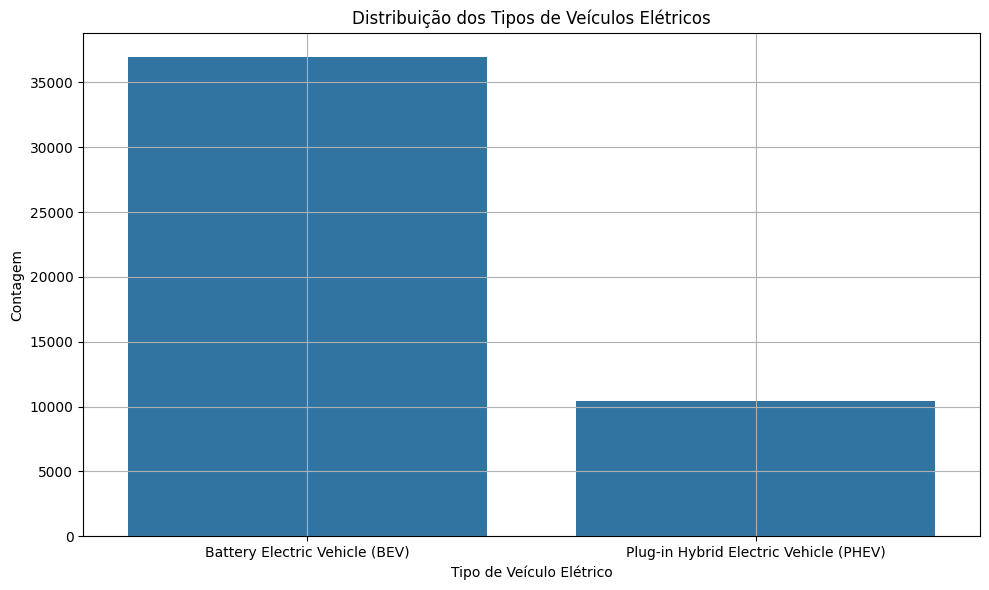

In [12]:
#info do dataset

ev_data.info()

ev_data.describe()
ev_data.isnull().sum()


#tipos de veiculos eletricos
plt.figure(figsize=(10, 6))
sns.countplot(x='Electric Vehicle Type', data=ev_data)
plt.title('Distribuição dos Tipos de Veículos Elétricos')
plt.xlabel('Tipo de Veículo Elétrico')
plt.ylabel('Contagem')
plt.grid(True)
plt.tight_layout()
plt.show()



In [15]:
category = [i for i in ev_data.columns if ev_data[i].dtype == 'object']
numerical = [i for i in ev_data.columns if ev_data[i].dtype != 'object']
ev_data[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
Postal Code,47415.0,9.818079e+04,4.198194e+02,2.754000e+04,9.803400e+04,9.810900e+04,9.818800e+04,9.940300e+04
Model Year,47418.0,2.020844e+03,2.938084e+00,1.998000e+03,2.019000e+03,2.022000e+03,2.023000e+03,2.025000e+03
Electric Range,47417.0,5.604665e+01,9.038436e+01,0.000000e+00,0.000000e+00,0.000000e+00,7.300000e+01,3.370000e+02
Base MSRP,47417.0,1.007892e+03,8.010764e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.844000e+05
Legislative District,47409.0,3.156736e+01,1.484417e+01,1.000000e+00,1.800000e+01,3.600000e+01,4.500000e+01,4.900000e+01
DOL Vehicle ID,47417.0,2.245054e+08,7.378157e+07,4.469000e+03,1.873146e+08,2.338937e+08,2.589406e+08,4.789259e+08
2020 Census Tract,47414.0,5.303107e+10,3.295213e+08,4.013061e+09,5.303301e+10,5.303302e+10,5.303303e+10,5.307794e+10


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

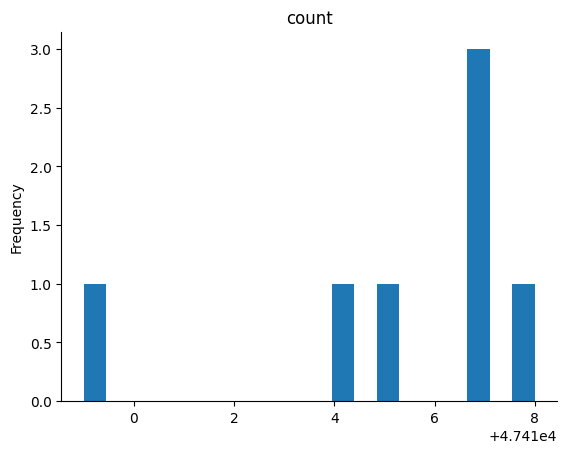

In [18]:
from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [66]:
#estatistica por categoria
ev_data[category].describe().T

,count,unique,top,freq
VIN (1-10),47418,7875,7SAYGDEE7P,323
County,47415,39,King,34717
City,47415,260,Seattle,8867
State,47418,8,WA,47410
Make,47418,38,TESLA,21388
Model,47418,138,MODEL Y,9927
Electric Vehicle Type,47418,2,Battery Electric Vehicle (BEV),36976
Clean Alternative Fuel Vehicle (CAFV) Eligibility,47418,4,Eligibility unknown as battery range has not b...,25138
Vehicle Location,47414,360,POINT (-122.271716 47.452837),2583
Electric Utility,47414,59,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),23979


from matplotlib import pyplot as plt
import seaborn as sns
_df_13.groupby('count').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

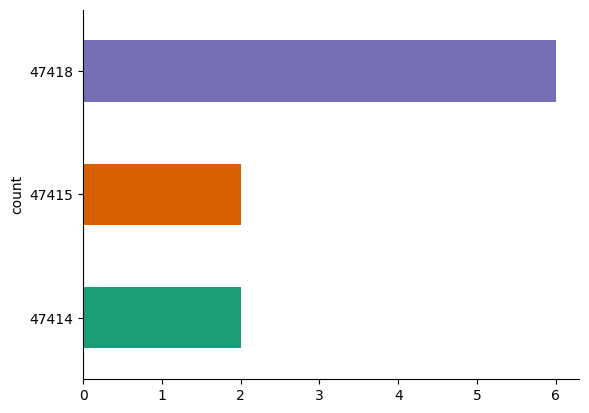

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('count').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
#Missing value

ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               3
City                                                 3
State                                                0
Postal Code                                          3
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       1
Base MSRP                                            1
Legislative District                                 9
DOL Vehicle ID                                       1
Vehicle Location                                     4
Electric Utility                                     4
2020 Census Tract                                    4
dtype: int64

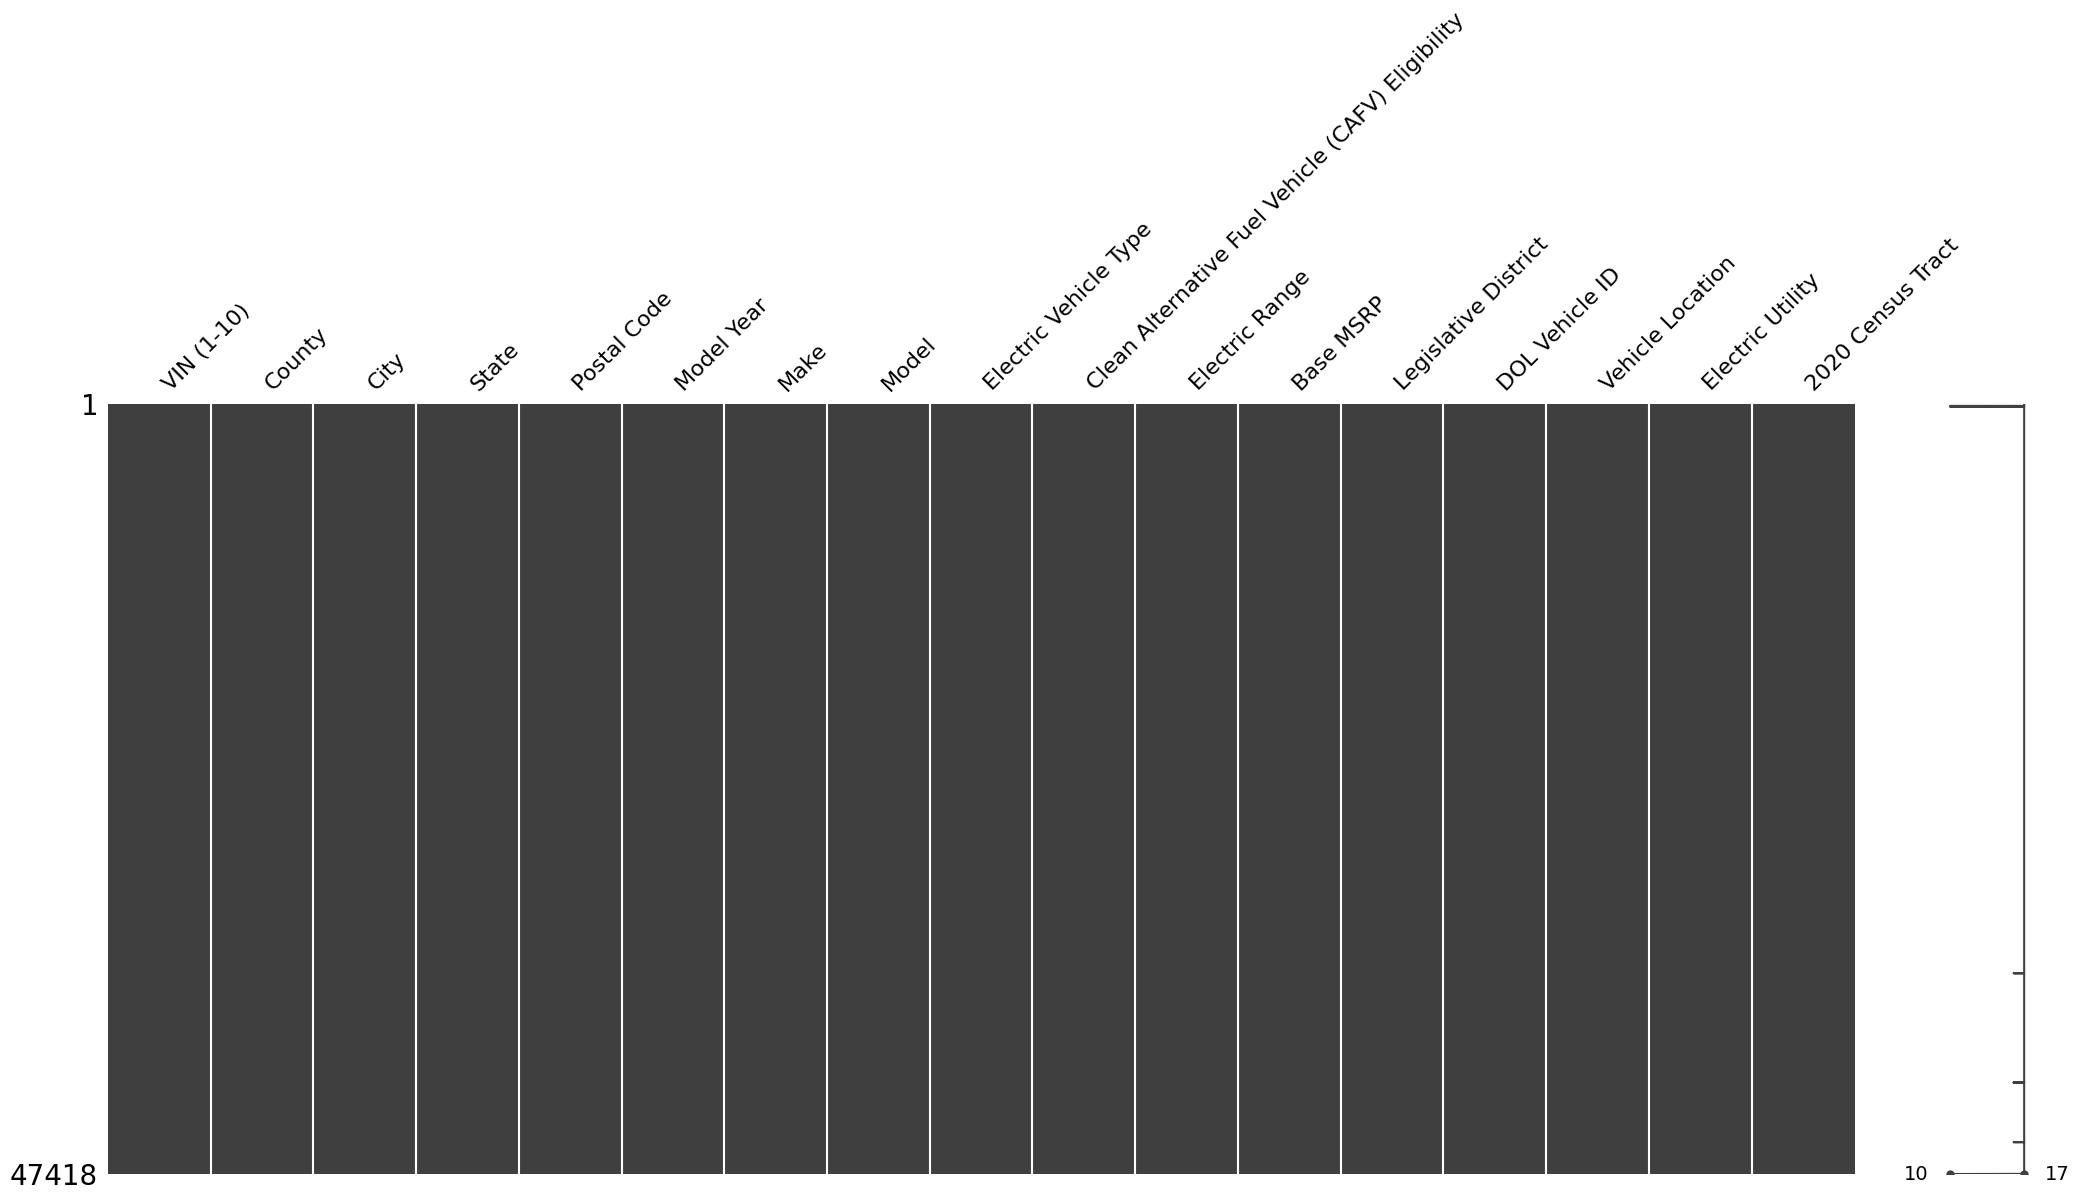

In [25]:
#data columns com missing value

msno.matrix(ev_data)
plt.show()

In [12]:
#previsao de alcance

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

 #Variaveis independentes e dependentes
X = ev_data[['Model Year', 'Base MSRP']]
y = ev_data['Electric Range']

#dados em treinoe teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

#previsao
y_pred = model.predict(X_test)

#Avaliaçao do modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 6343.689116974665


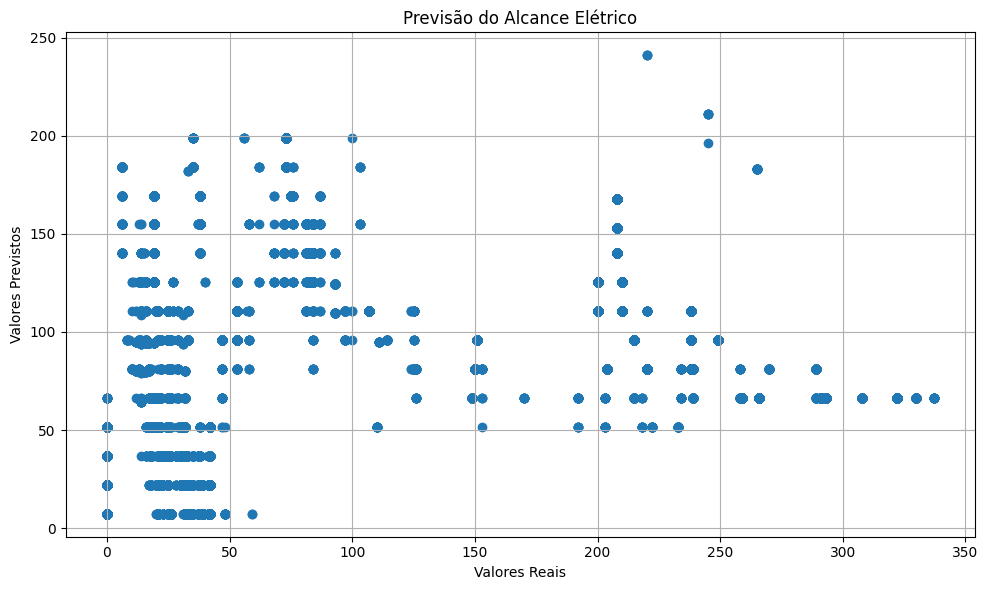

In [20]:
#resultado de previsao
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Previsão do Alcance Elétrico')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
#categoria
ev_data[category].columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')

In [27]:
ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270.0,0.0,43.0,202233958.0,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20.0,0.0,15.0,264425178.0,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84.0,0.0,11.0,114962025.0,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208.0,0.0,1.0,232724670.0,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42.0,0.0,14.0,221023589.0,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


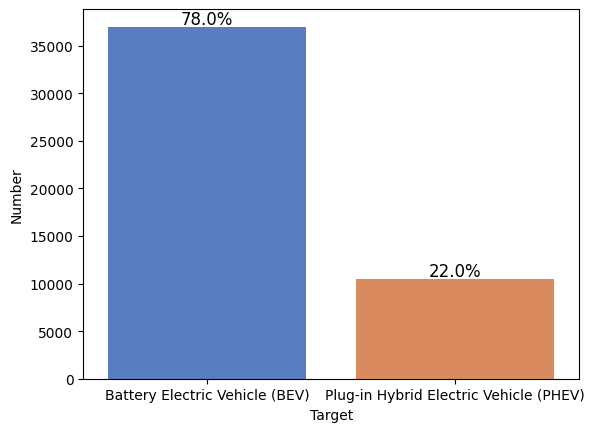

<Figure size 400x400 with 0 Axes>

In [76]:
# countplot do electric vehicles baseado no target variable
g = sns.countplot(x='Electric Vehicle Type', data=ev_data, palette='muted')
g.set(ylabel='Number', xlabel='Target')


#percentagem
chart = 'Number of Electric Vehicles Based on Target'


plt.figure(figsize=(4, 4))
plt.suptitle(f'{chart}', y=1)



total = len(ev_data['Electric Vehicle Type'])
for p in g.patches:
            height = p.get_height()
            percentage = (height / total) * 100
            g.annotate(f'{percentage:.1f}%', (p.get_x() + p.get_width() / 2, height -100), \
                            ha='center', va='bottom', fontsize=12)

plt.show()

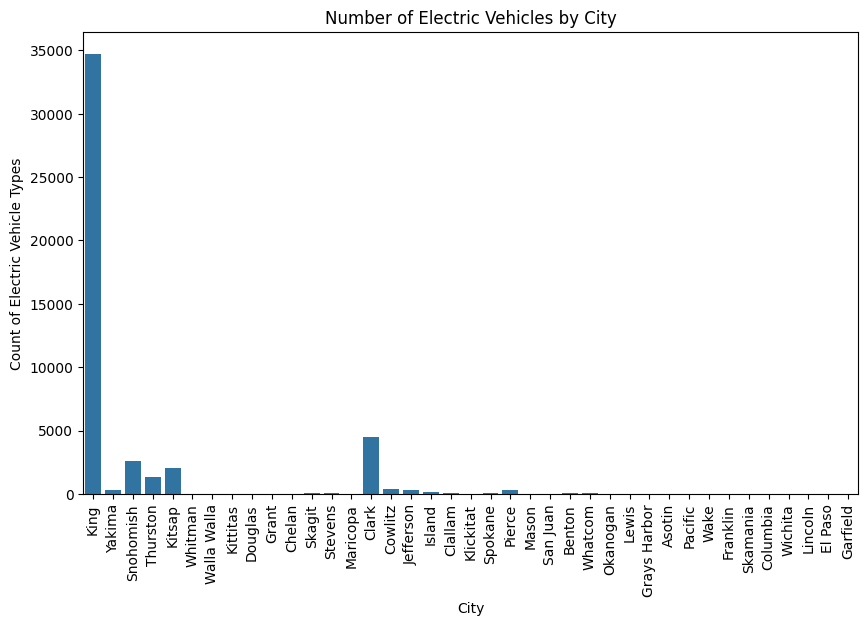

In [79]:
#numero de veiculo eletrico por continent
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize chart title
chart = 'Number of Electric Vehicles by City'

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(x='County', data=ev_data)
plt.title(chart)
plt.xlabel('City')
plt.ylabel('Count of Electric Vehicle Types')
plt.xticks(rotation=90)
plt.show()


Text(0, 0.5, 'Model Year')

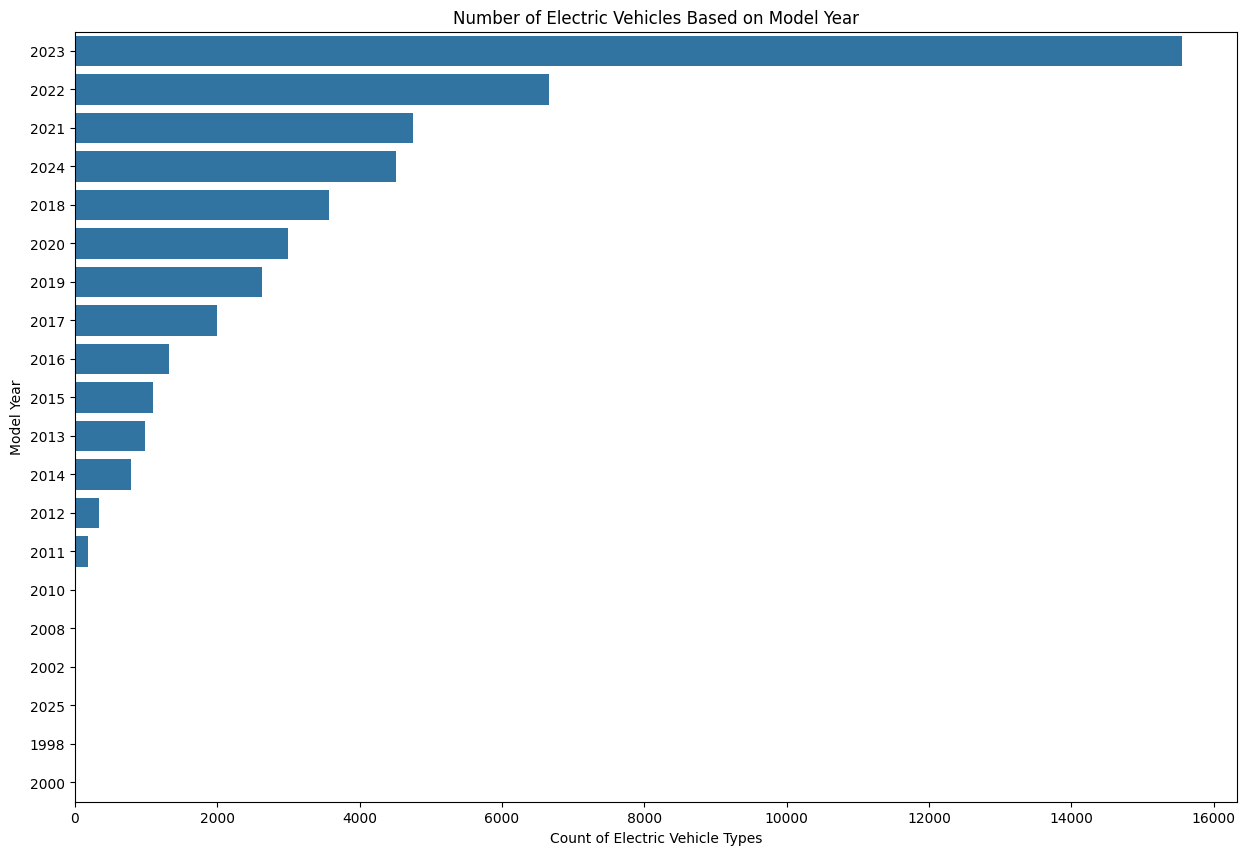

In [64]:
#veiculo baseado no modelo de ano
chart = 'Number of Electric Vehicles Based on Model Year'
plt.figure(figsize=(15, 10))
sns.countplot(y='Model Year', data=ev_data, order=ev_data['Model Year'].value_counts().index)
plt.title(chart)
plt.xlabel('Count of Electric Vehicle Types')
plt.ylabel('Model Year')
